In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('../Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('../Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns
gene_names = Y.columns

# List of columns for iterating
columns = list(Y)

In [3]:
# scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# applying pca algorithm
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

Explained variance: [0.26987043 0.14701207]
Cumulative: [0.26987043 0.4168825 ]


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

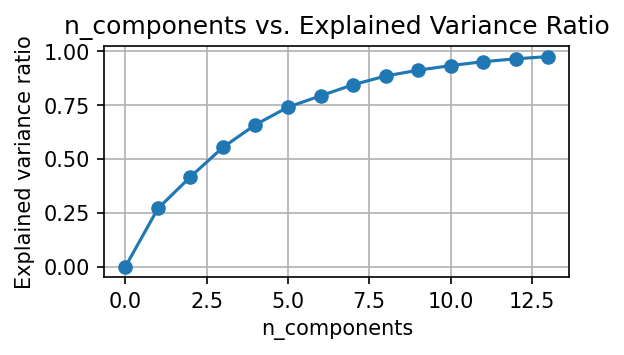

In [3]:
# Testing different n_components
nums = np.arange(14)

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [5]:
principal_components = pca.components_
for p in range(len(principal_components)):
    print(principal_components[p])
    print(len(principal_components[p]))

[-0.17811185  0.34802785 -0.05035307 -0.04102885 -0.05538039 -0.05844356
  0.30512083  0.26942429  0.19443563  0.29590193 -0.2655086   0.34080261
  0.26839442  0.13809829  0.1520321   0.09961059 -0.17027902 -0.
  0.18807221 -0.19558332 -0.25690183  0.25690183]
22
[-0.20260339 -0.06421788  0.43418893  0.35403418  0.48779892  0.47254702
 -0.11798481  0.03959209  0.01786374  0.09392257  0.10241585 -0.0942916
  0.12076378 -0.19729401  0.1201502   0.12143126  0.01761499  0.
  0.0284524  -0.13859183 -0.12785312  0.12785312]
22


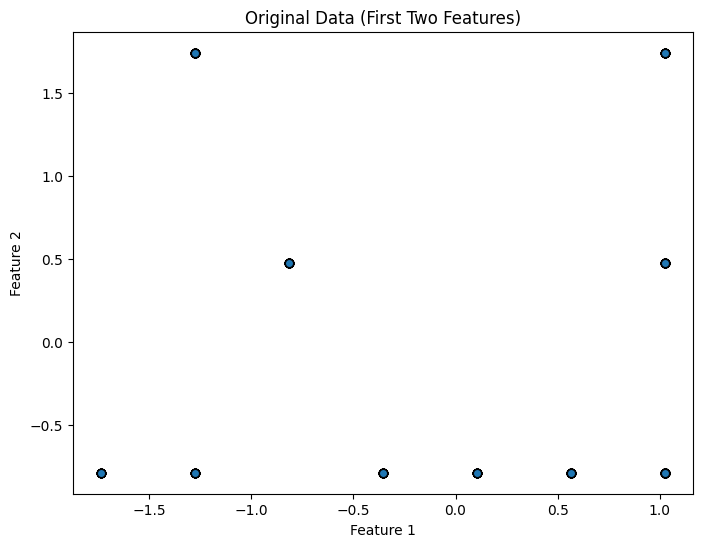

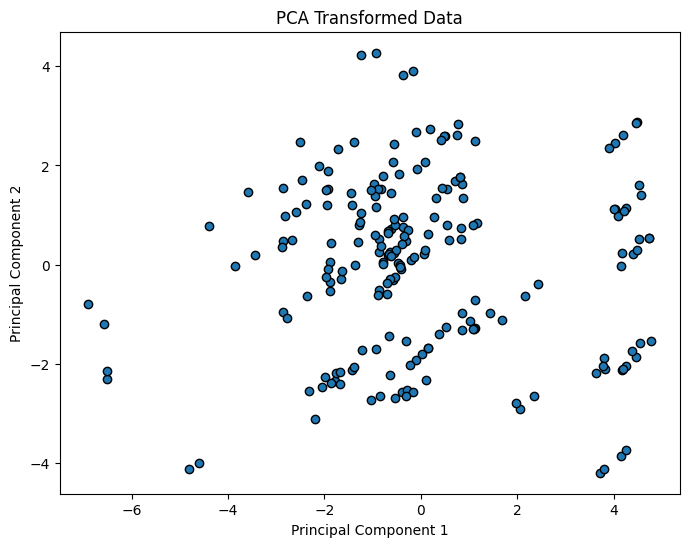

In [10]:
# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.show()